<a href="https://colab.research.google.com/github/kram254/100_Days_of_Python/blob/main/Car_Price_Prediction_Model_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

 # Car Price Prediction Model using Python

<center>

This dataset here used to train a car price prediction model was obtained from Kaggle.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

car_data = pd.read_csv("CarPrice.csv")
price_data = pd.read_csv("car_price_prediction.csv")
data = pd.read_csv("data.csv")
toyota_cars = pd.read_csv("toyota_cars.csv")
car_prediction_data = pd.read_csv("car_prediction_data.csv")
carprices = pd.read_csv("carprices.csv")
ford = pd.read_csv("ford.csv")
pakwheels = pd.read_csv("pakwheels.csv")
used_cars = pd.read_csv("used_cars.csv")

datasets = [car_data, price_data, data, toyota_cars, car_prediction_data, carprices, ford, pakwheels, used_cars]

for dataset in datasets:
    print("~~~~ Features Dataset ~~~~~")
    print("Dataset Summary:")
    print(dataset.head())
    print(dataset.describe())
    print(dataset.isnull().sum())
    print("\n")


~~~~ Features Dataset ~~~~~
Dataset Summary:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke co

## Data Information

In [3]:
print("Shape of the dataset:", data.shape)


Shape of the dataset: (251079, 15)


In [4]:
detailed_car_info = []

combined_data = pd.concat(datasets)

unique_car_names = combined_data['CarName'].unique()

for car_name in unique_car_names:
    car_data = combined_data[combined_data['CarName'] == car_name]

    car_count = len(car_data)
    average_price = car_data['price'].mean()
    min_price = car_data['price'].min()
    max_price = car_data['price'].max()
    mileage_mean = car_data['mileage'].mean()

    car_info = {
        'Car Name': car_name,
        'Number of Occurrences': car_count,
        'Average Price': average_price,
        'Minimum Price': min_price,
        'Maximum Price': max_price,
        'Average Mileage': mileage_mean,
    }


    detailed_car_info.append(car_info)

for car_info in detailed_car_info:
    print("Car Name:", car_info['Car Name'])
    print("Number of Occurrences:", car_info['Number of Occurrences'])
    print("Average Price: ${:.2f}".format(car_info['Average Price']))
    print("Minimum Price: ${}".format(car_info['Minimum Price']))
    print("Maximum Price: ${}".format(car_info['Maximum Price']))
    print("Average Mileage:", car_info['Average Mileage'])

    print("-------------------------------------------------------")


Car Name: alfa-romero giulia
Number of Occurrences: 1
Average Price: $13495.00
Minimum Price: $13495.0
Maximum Price: $13495.0
Average Mileage: nan
-------------------------------------------------------
Car Name: alfa-romero stelvio
Number of Occurrences: 1
Average Price: $16500.00
Minimum Price: $16500.0
Maximum Price: $16500.0
Average Mileage: nan
-------------------------------------------------------
Car Name: alfa-romero Quadrifoglio
Number of Occurrences: 1
Average Price: $16500.00
Minimum Price: $16500.0
Maximum Price: $16500.0
Average Mileage: nan
-------------------------------------------------------
Car Name: audi 100 ls
Number of Occurrences: 1
Average Price: $13950.00
Minimum Price: $13950.0
Maximum Price: $13950.0
Average Mileage: nan
-------------------------------------------------------
Car Name: audi 100ls
Number of Occurrences: 2
Average Price: $17580.00
Minimum Price: $17450.0
Maximum Price: $17710.0
Average Mileage: nan
--------------------------------------------

# Visualization using seaborn

<ipython-input-5-dc792fddef23>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_prices)


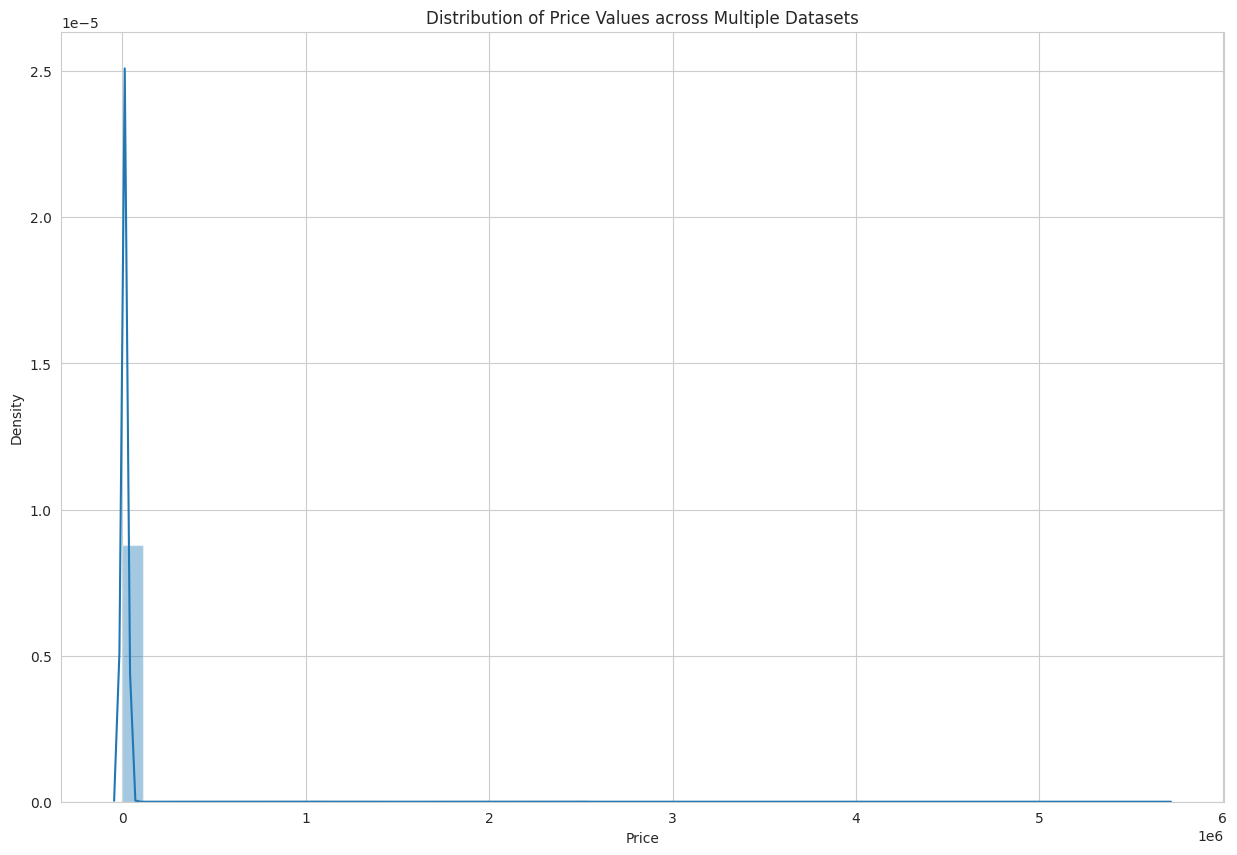

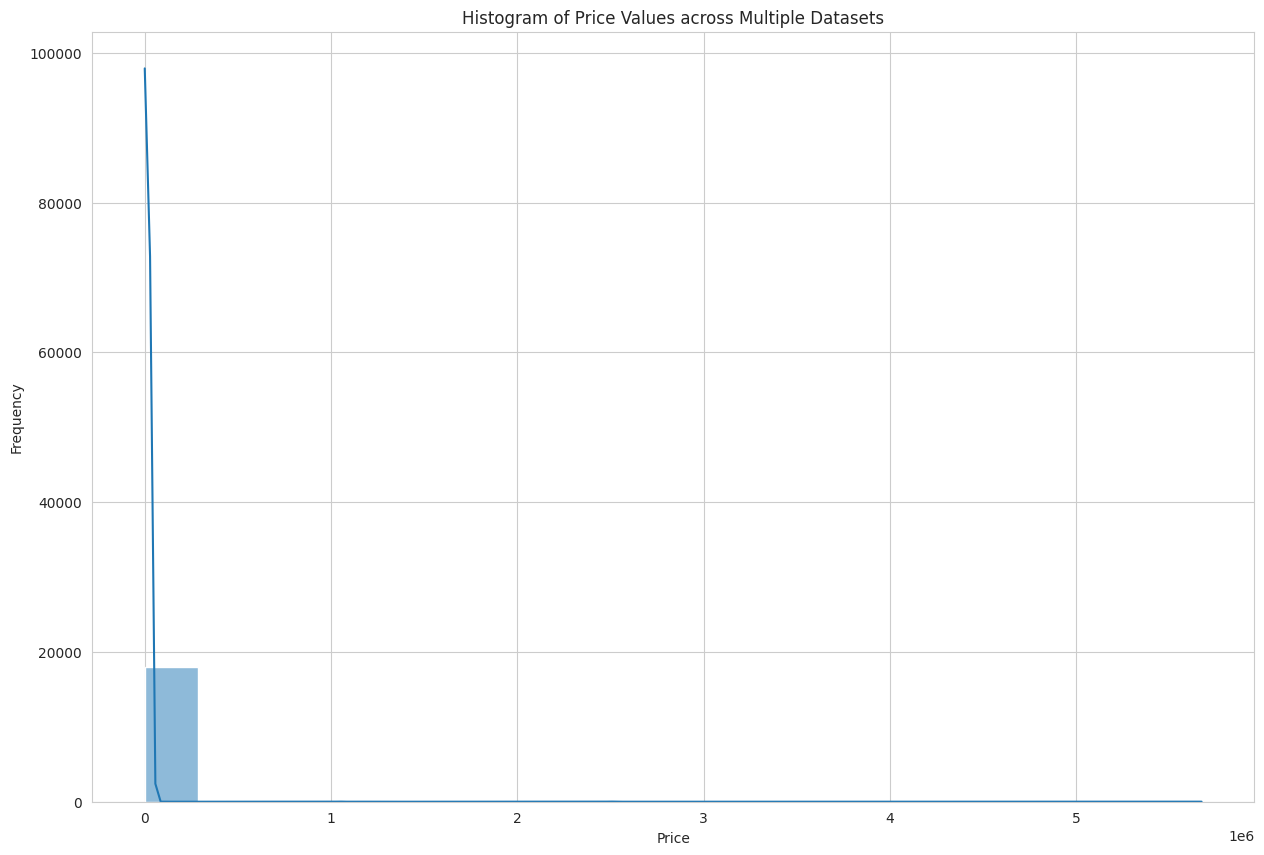

In [5]:
# Combine all price data from the datasets
all_prices = []

datasets = [car_data, price_data, data, toyota_cars, car_prediction_data, carprices, ford, pakwheels, used_cars]

for dataset in datasets:
    if 'price' in dataset.columns:
        all_prices.extend(dataset['price'])

# Plotting the distribution of price values using distplot and histplot
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Use distplot for an overall distribution
sns.distplot(all_prices)
plt.title('Distribution of Price Values across Multiple Datasets')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Using histplot for a more granular view of price distribution
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

sns.histplot(all_prices, kde=True, bins=20)
plt.title('Histogram of Price Values across Multiple Datasets')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# **Creating a heatmap to visualize correlations in the combined dataset**

<ipython-input-6-0d89633bcae7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = data.corr()


               Unnamed: 0  mileage_in_km
Unnamed: 0       1.000000      -0.094007
mileage_in_km   -0.094007       1.000000


<ipython-input-6-0d89633bcae7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datasets.corr()


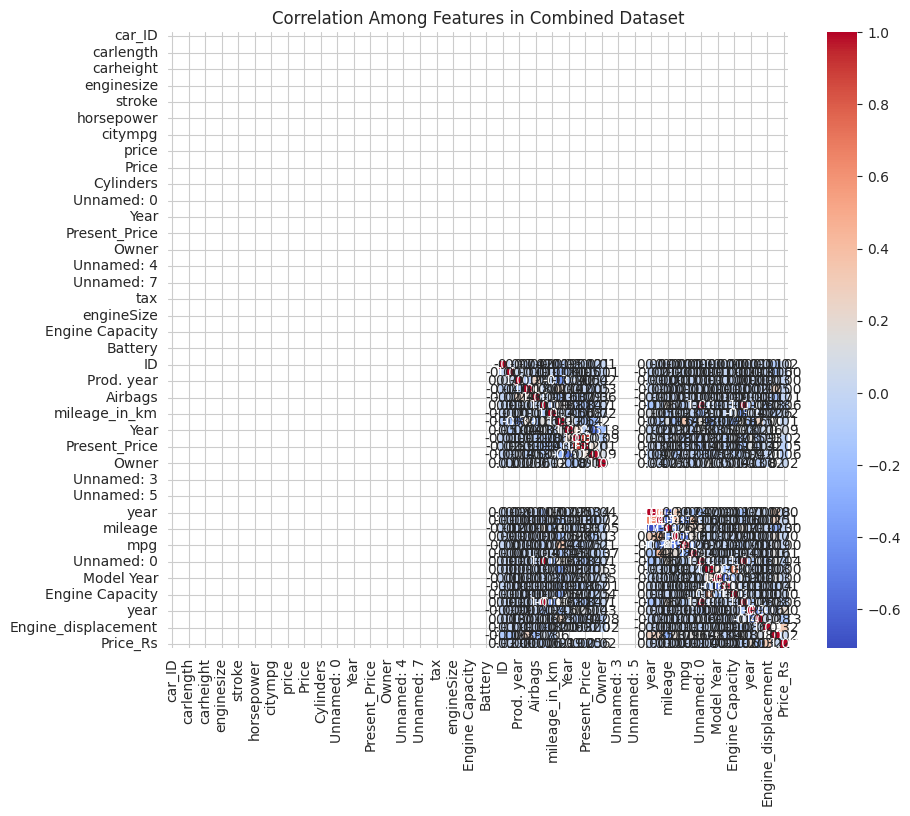

In [6]:
correlation_data = data.corr()
print(correlation_data)

datasets = pd.concat([car_data, price_data, data, toyota_cars, car_prediction_data, carprices, ford, pakwheels, used_cars], axis=1)

correlation_matrix = datasets.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Among Features in Combined Dataset')
plt.show()

<ipython-input-9-3527fab008d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = datasets.corr()


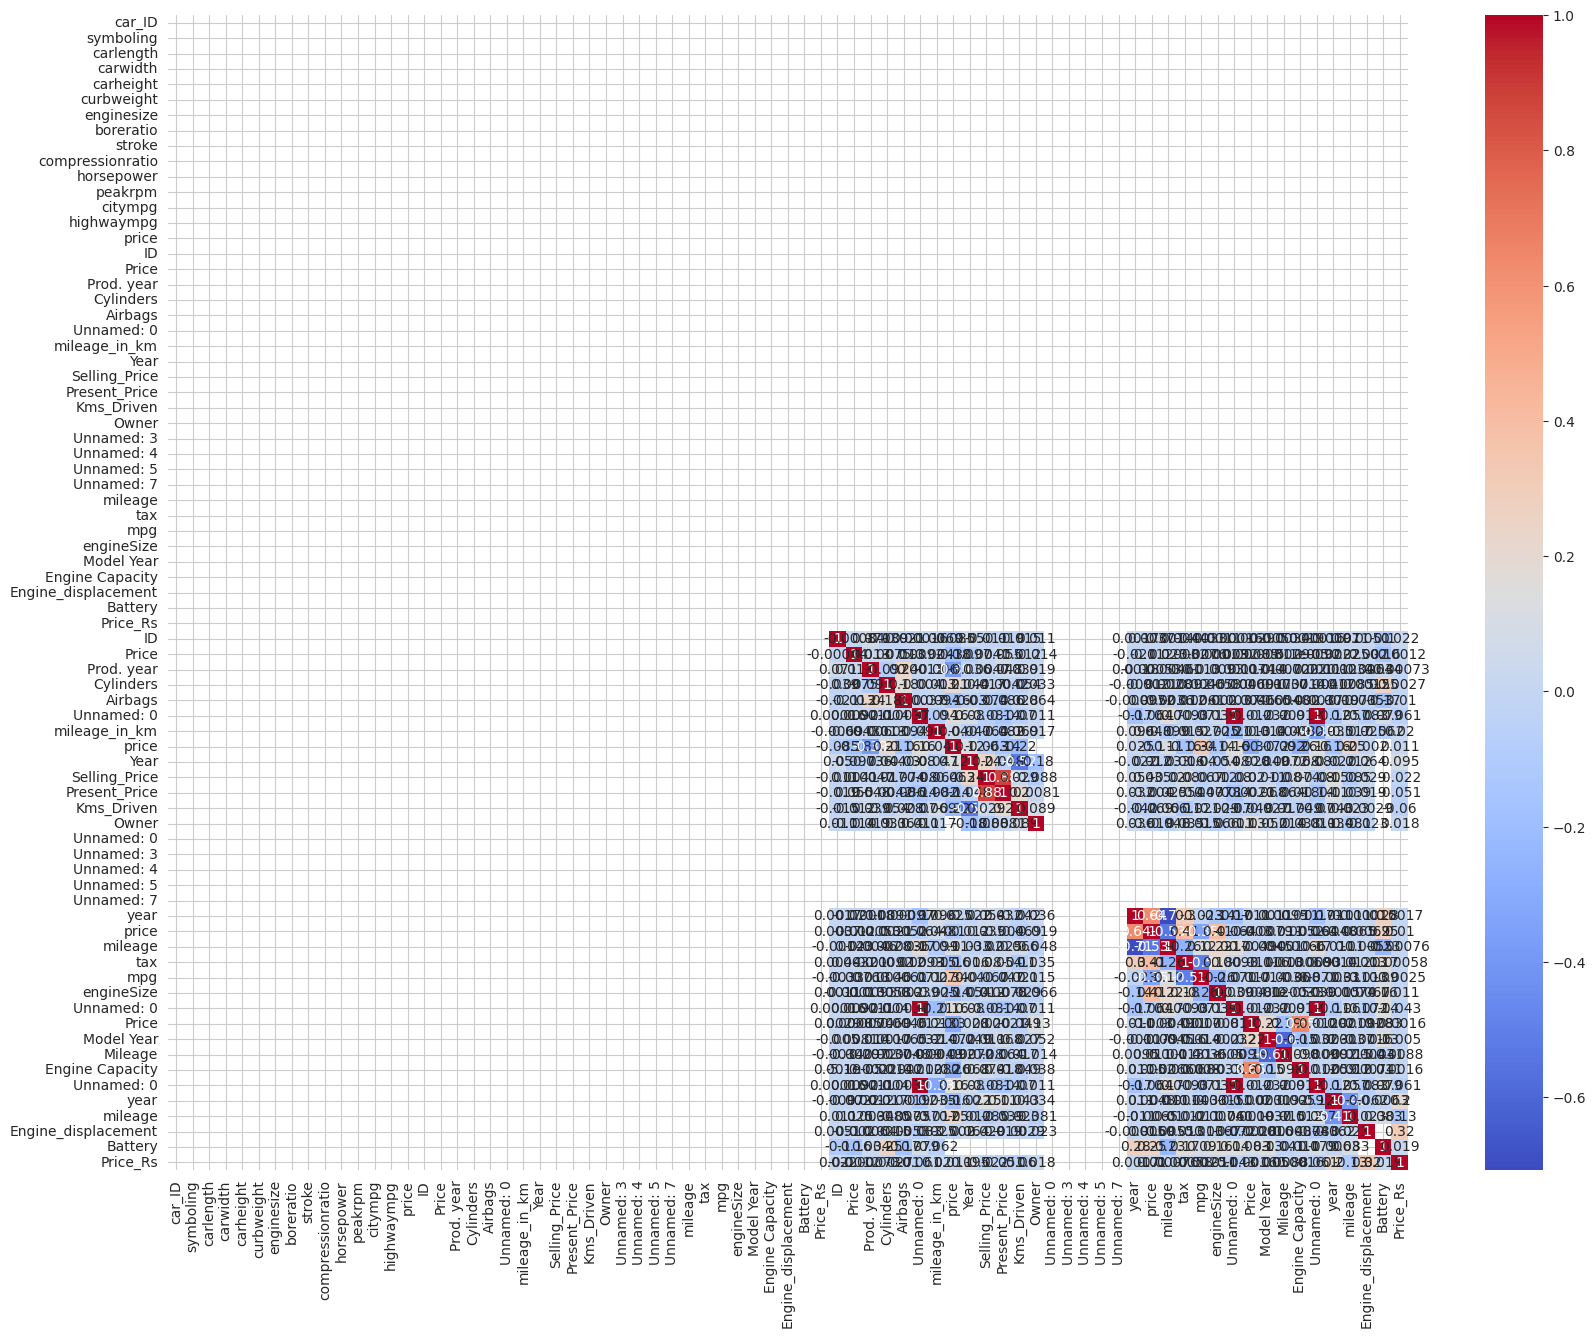

In [ ]:
plt.figure(figsize=(20, 15))
correlations = datasets.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

# **Defining the features and the target variable**




In [9]:
predict = "price"
features = ["symboling", "wheelbase", "carlength",
            "carwidth", "carheight", "curbweight",
            "enginesize", "boreratio", "stroke",
            "compressionratio", "horsepower", "peakrpm",
            "citympg", "highwaympg", "price"]


# **Using the decision tree regression algorithm to train a car price prediction model**

In [10]:
filtered_data = combined_data[features].dropna()

X = filtered_data.drop([predict], axis=1)
y = filtered_data[predict]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)



Mean Absolute Error: 1823.388219512195
Accuracy: 0.9033984434575777


# **Output**

# **Mean Absolute Error: 1823.388219512195** <br>
# **Accuracy: 0.9033984434575777**

# **Scatter plot Visualization of Actual vs. Predicted Prices**

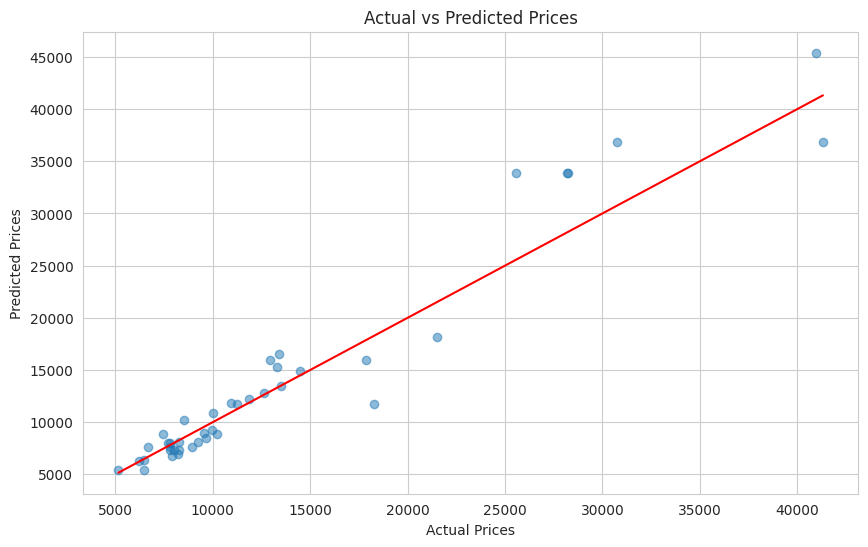

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


# **Residuals Plot**

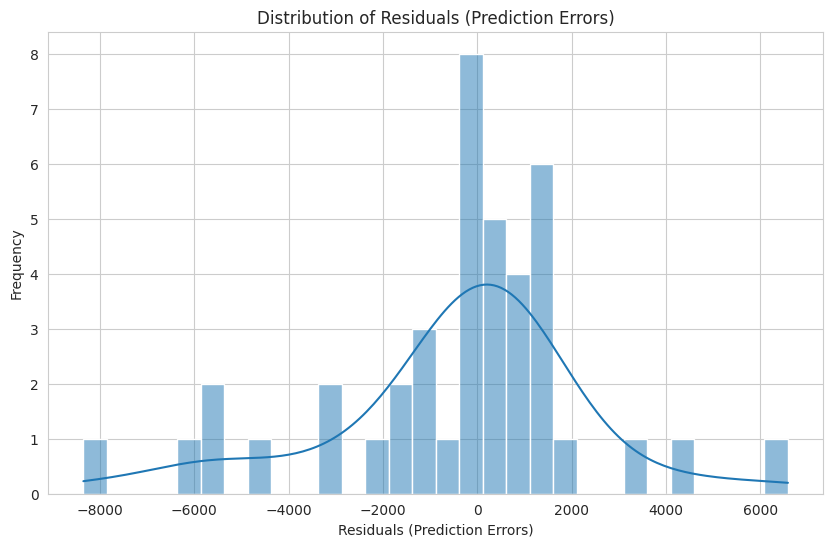

In [13]:
# Calculate residuals (prediction errors)
residuals = y_test - predictions

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals (Prediction Errors)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Prediction Errors)")
plt.grid(True)
plt.show()


# **Regression Plot with Residuals**

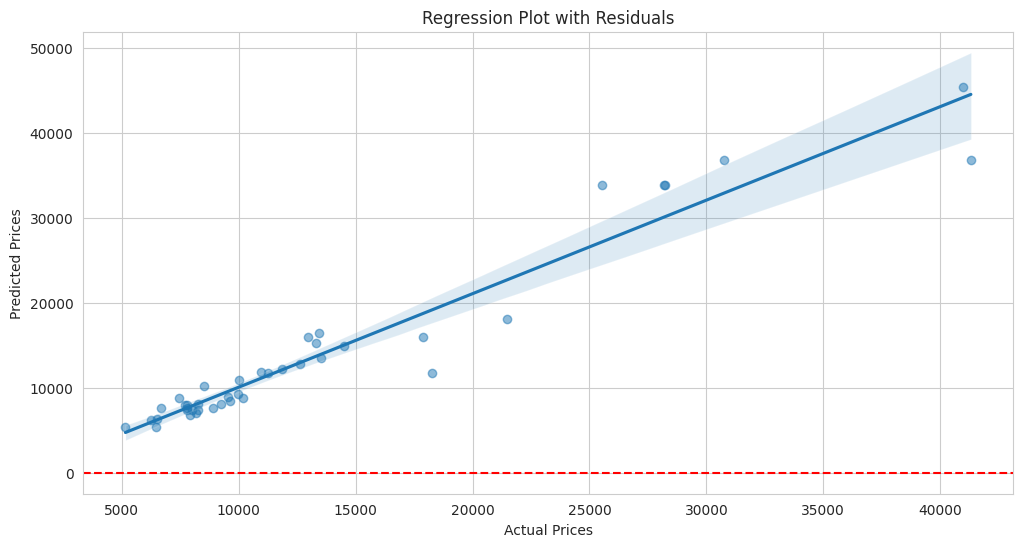

In [14]:
predictions = model.predict(x_test)

plt.figure(figsize=(12, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.5})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Plot with Residuals")
plt.grid(True)

residuals = y_test - predictions

plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# **Create a residuals vs. predicted plot**

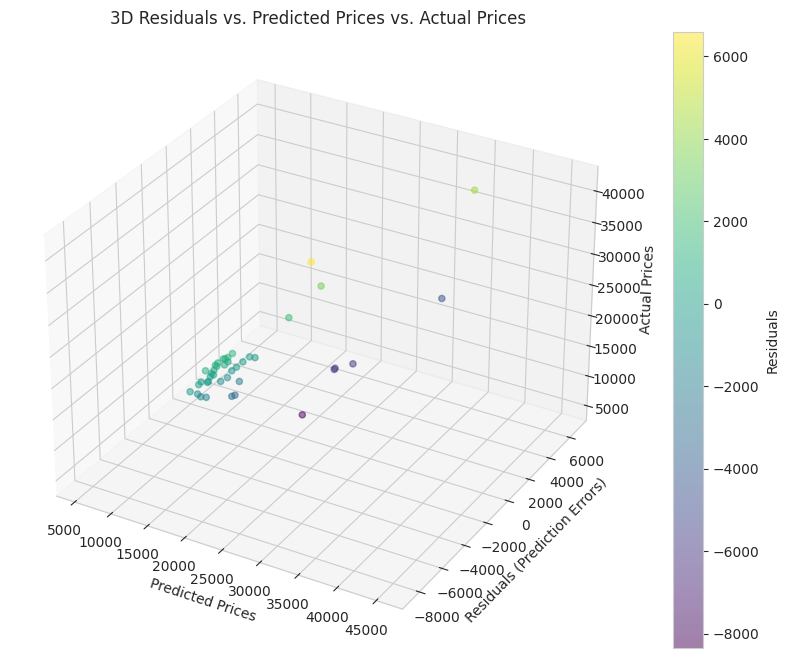

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(predictions, residuals, y_test, c=residuals, cmap='viridis', alpha=0.5)


ax.set_xlabel("Predicted Prices")
ax.set_ylabel("Residuals (Prediction Errors)")
ax.set_zlabel("Actual Prices")
ax.set_title("3D Residuals vs. Predicted Prices vs. Actual Prices")

cbar = fig.colorbar(scatter)
cbar.set_label("Residuals")

plt.show()
